In [59]:
#Simple Linear Regression
class Linearregretion:
    
    def __init__(self, X, y):
        self.x = X
        self.y = y
        
    #regression fuction    
    def func(self):
        return self.w0 + self.x * self.w1
    
    def loss_func(self):
        return  sum(np.square(self.y - (w0 + w1*self.x)))
    
    def w_algebra(self):
        n = len(self.x)
        w1 = (n*sum(self.x*self.y) - sum(self.x)*sum(self.y))/(n*sum(self.x*self.x) - sum(self.x)*sum(self.x))
        w0 = (sum(self.x*self.x)*sum(self.y) - sum(self.x)*sum(self.x*self.y))/(n*sum(self.x*self.x)-sum(self.x)*sum(self.x))
        return w0, w1
    
    def w_matrix(self):
        return (self.x.T * self.x).I * self.x.T * self.y

41.33509168550616 0.7545842753077117


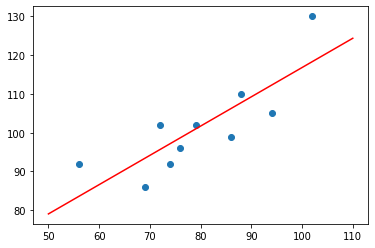

In [60]:
#test sample 代数方法
#造参数
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
x = np.array([56, 72, 69, 88, 102, 86, 76, 79, 94, 74])
y = np.array([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])
#拟合
model = Linearregretion(x,y)
w0,w1 = model.w_algebra()
print(w0,w1)
#绘图
x_temp = np.linspace(50, 110, 100)  
plt.scatter(x, y)
plt.plot(x_temp, x_temp*w1 + w0, 'r')

41.33509168550618 0.7545842753077134


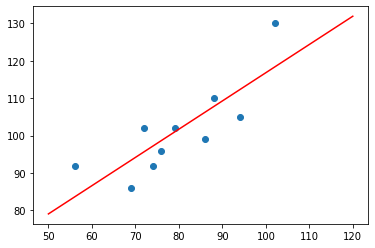

In [48]:
#test sample 矩阵方法
x1 = np.matrix([[1, 56], [1, 72], [1, 69], [1, 88], [1, 102],
               [1, 86], [1, 76], [1, 79], [1, 94], [1, 74]])
y1 = np.matrix([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])
#拟合
model = Linearregretion(x1,y1.reshape(10, 1))
w2 = model.w_matrix()[0,0]
w3 = model.w_matrix()[1,0]
print(w2,w3)
#绘图
x_temp = np.linspace(50, 120, 100) 
plt.scatter(x, y)
plt.plot(x_temp, x_temp*w3 + w2, 'r')

In [47]:
#使用sklearn.linear_model.LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape(len(x), 1),y)
# 得到模型拟合参数
model.intercept_, model.coef_

(41.33509168550615, array([0.75458428]))

In [61]:
#应用
import pandas as pd

df = pd.read_csv(
    "data/boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


寻找boston房价和特征值之间的线性关系

In [62]:
#取3项特征
features = df[['crim', 'rm', 'lstat']]

In [63]:
#划分数据集
target = df['medv']  # 目标值数据

split_num = int(len(features)*0.7)  # 得到 70% 位置

X_train = features[:split_num]  # 训练集特征
y_train = target[:split_num]  # 训练集目标

X_test = features[split_num:]  # 测试集特征
y_test = target[split_num:]  # 测试集目标

In [64]:
#构建和训练模型
model = LinearRegression()  # 建立模型
model.fit(X_train, y_train)  # 训练模型
model.coef_, model.intercept_  # 输出训练后的模型参数和截距项

(array([ 0.69979497, 10.13564218, -0.20532653]), -38.000969889690275)

In [65]:
#预测结果
preds = model.predict(X_test)  # 输入测试集特征进行预测
preds  # 预测结果

array([17.77439141, 21.09512448, 27.63412265, 26.78577951, 25.38313368,
       24.3286313 , 28.4257879 , 25.12834727, 16.82806601, 20.76498858,
       52.3350748 , -0.18169806, 12.01475786,  7.87878077, 15.13155699,
       32.93748235, 37.07872049, 29.50613719, 25.50800832, 12.35867972,
        9.08901644, 47.08374238, 35.31759193, 33.3738765 , 38.34913316,
       33.10414639, 91.3556125 , 35.11735022, 19.69326952, 18.49805269,
       14.03767555, 20.9235166 , 20.41406182, 21.92218226, 15.20451678,
       18.05362998, 21.26289453, 23.18192502, 15.87149504, 27.70381826,
       27.65958772, 30.17151829, 27.04987446, 21.52730227, 37.82614512,
       22.09872387, 34.71166346, 32.07959454, 29.45253042, 29.51137956,
       41.49935191, 62.4121152 , 13.64508882, 24.71242033, 18.69151684,
       37.4909413 , 54.05864658, 34.94758034, 15.01355249, 30.17849355,
       32.22191275, 33.90252834, 33.02530285, 28.4416789 , 69.60201087,
       34.7617152 , 31.65353442, 24.5644437 , 24.78130285, 24.00

In [66]:
#模型评估 MAE/MSE
def mae_value(y_true, y_pred):
    n = len(y_true)
    mae = sum(np.abs(y_true - y_pred))/n
    return mae
def mse_value(y_true, y_pred):
    n = len(y_true)
    mse = sum(np.square(y_true - y_pred))/n
    return mse

In [67]:
mae = mae_value(y_test.values, preds)
mse = mse_value(y_test.values, preds)

print("MAE: ", mae)
print("MSE: ", mse)

MAE:  13.022063072780197
MSE:  303.83312472235923
